In [1]:
"""
coding:utf-8
SPRING 2022 -CIS 493/593 – BIG DATA LAB ASSIGNMENT - 4
Author: Sabareeswaran Shanmugam
Topic :Information Retrieval: Document Similarity Measure Pre-processing to Build Document Vectors for Web Page Content Analysis.
"""
# scraping text from 6 URL Websites.
# preprocessing Stage.
import ssl
import string
import re
ssl._create_default_https_context = ssl._create_unverified_context
from urllib.request import urlopen,Request
from bs4 import BeautifulSoup
import os
from IPython import display
# Set Absolute_path to ROOT.
sab_absolute_path = os.path.dirname(os.path.abspath("__file__"))

# Scaping only text from the 6 website URLS.
url =["https://en.wikipedia.org/wiki/Machine_learning","https://en.wikipedia.org/wiki/Engineering","https://my.clevelandclinic.org/research","https://en.wikipedia.org/wiki/Data_mining","https://en.wikipedia.org/wiki/Data_mining#Data_mining","http://cis.csuohio.edu/~sschung/"]

for links in url:
    req = Request(links, headers={'User-Agent': 'Mozilla/5.0'})
    web_byte = urlopen(req).read()
    html = web_byte.decode('utf-8')
    soup = BeautifulSoup(html, features="html.parser")

    # kill all script and style elements
    for script in soup(["script", "style"]):
        script.extract()    # rip it out

    # get text
    text = soup.get_text()
    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)
    hyperlink_removed_text=re.sub(r'https?:\/\/.*[\r\n]*', '',text)
    te=text.translate(str.maketrans('', '', string.punctuation))
    pattern = r'[0-9]'
    new_string = re.sub(pattern, '', te)
    new_string =new_string.lower()
    bg1=re.sub('machine learning',' machinelearning ', new_string)
    bg2=re.sub('deep learning',' deeplearning ', bg1)
    bg3=re.sub('data mining',' datamining ', bg2)
    final= re.sub("\s\s+", " ", bg3)
    final2= re.sub("–", "", final)
    final3=re.sub('[^a-zA-Z0-9 \n\.]', ' ',final2)
    if url.index(links) is 0:
        Document1= open(sab_absolute_path+'/PreprocessedDataset/document1.txt','w')
        Document1.write(final3)
        Document1.close()
        print("Document1 Preprocessed and saved as TextFile!")
    if url.index(links) is 1:
        Document2= open(sab_absolute_path+'/PreprocessedDataset/document2.txt','w')
        Document2.write(final3)
        Document2.close()
        print("Document2 Preprocessed and saved as TextFile!")
    if url.index(links) is 2:
        Document3= open(sab_absolute_path+'/PreprocessedDataset/document3.txt','w')
        Document3.write(final3)
        Document3.close()
        print("Document3 Preprocessed and saved as TextFile!")
    if url.index(links) is 3:
        Document4= open(sab_absolute_path+'/PreprocessedDataset/document4.txt','w')
        Document4.write(final3)
        Document4.close()
        print("Document4 Preprocessed and saved as TextFile!")
    if url.index(links) is 4:
        Document5= open(sab_absolute_path+'/PreprocessedDataset/document5.txt','w')
        Document5.write(final3)
        Document5.close()
        print("Document5 Preprocessed and saved as TextFile!")
    if url.index(links) is 5:
        Document6= open(sab_absolute_path+'/PreprocessedDataset/document6.txt','w')
        Document6.write(final3)
        Document6.close()
        print("Document6 Preprocessed and saved as TextFile!")
print("All 6 documents scraped from URL links and stored Text data locally under PreprocessedDataset directory !")



Document1 Preprocessed and saved as TextFile!
Document2 Preprocessed and saved as TextFile!
Document3 Preprocessed and saved as TextFile!
Document4 Preprocessed and saved as TextFile!
Document5 Preprocessed and saved as TextFile!
Document6 Preprocessed and saved as TextFile!
All 6 documents scraped from URL links and stored Text data locally under PreprocessedDataset directory !


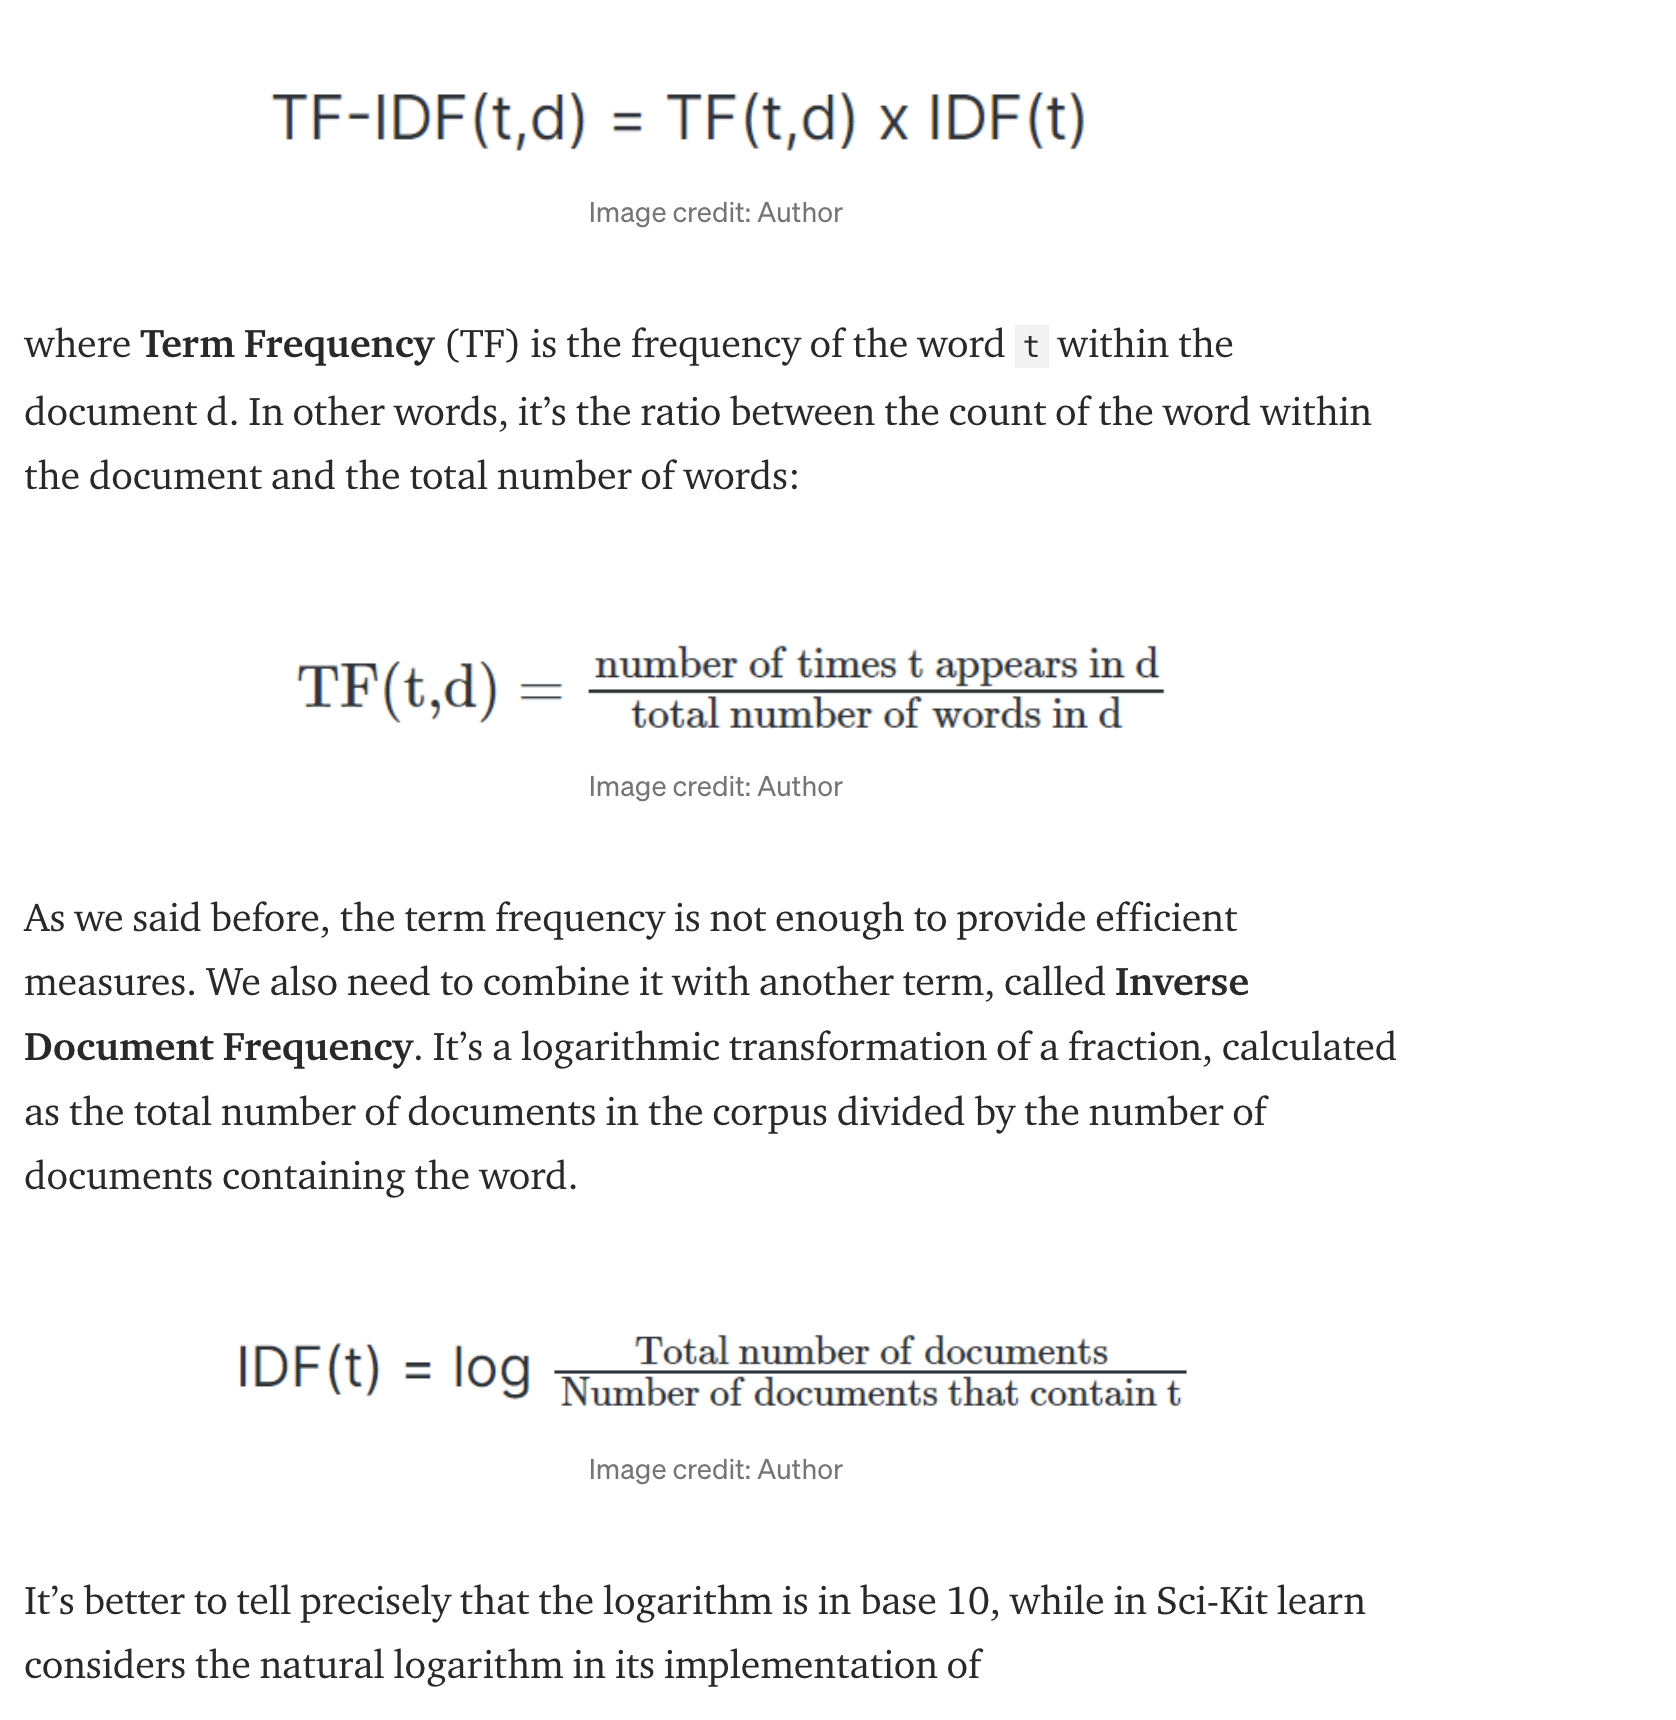

In [2]:
# TFIDF formula

display.Image(sab_absolute_path+'/Results_img/TFID_formula.png', width=700, height=400)

In [3]:
# credits :https://github.com/matteobertozzi/blog-code/blob/master/py-inverted-index/invindex.py
# Inverted Index with Postings file location

from nltk.corpus import stopwords
from functools import reduce
import pandas as pd
_WORD_MIN_LENGTH = 3
_STOP_WORDS =stopwords.words('english')
def word_split(text):
    """
    here the postings location --> index of the word in text file location .
    for example :
        doc 1.txt - 'data is research"

    Explanation:
    Text information in Doc-1
        d a t a space i s space r e  s  e  a  r  c  h
        0 1 2 3   4   5 6   7   8 9 10 11 12 13 14 15
            1)the term 'data' occurs as a staring word in that text file
        then 'data' term posting is {[0]}
            2)the term 'research'  starts at index 8
        then 'research' term posting location is stored as {[8]}
    """
    word_list = []
    wcurrent = []
    windex = None

    for i, c in enumerate(text):
        if c.isalnum():
            wcurrent.append(c)
            windex = i
        elif wcurrent:
            word = u''.join(wcurrent)
            word_list.append((windex - len(word) + 1, word))
            wcurrent = []

    if wcurrent:
        word = u''.join(wcurrent)
        word_list.append((windex - len(word) + 1, word))

    return word_list

def words_cleanup(words):
    """
    Removing stopword and considering only the term word length > than 3.
    """
    cleaned_words = []
    for index, word in words:
        if len(word) < _WORD_MIN_LENGTH or word in _STOP_WORDS:
            continue
        cleaned_words.append((index, word))
    return cleaned_words

def words_normalize(words):
    """
     This will call normalization process on words. Making all the text to Lowercasse,
    """
    normalized_words = []
    for index, word in words:
        wnormalized = word.lower()
        normalized_words.append((index, wnormalized))
    return normalized_words

def word_index(text):
    """
    Helper method
    It calls word split, normalize and cleanup.
    """
    words = word_split(text)
    words = words_normalize(words)
    words=words_cleanup(words)
    return words


def inverted_index(text):
    """
    Create an Inverted-Index of the specified text document.
        {word:[locations]}
    """
    inverted = {}

    for index, word in word_index(text):
        locations = inverted.setdefault(word, [])
        locations.append(index)

    return inverted

def inverted_index_add(inverted, doc_id, doc_index):
    """
    Term Frequency with Inverse Document Frequency.
    Add Invertd-Index doc_index of the document doc_id to the Multi-Document Inverted-Index (inverted).
        {word:{doc_id:[locations]}}
    """
    for word, locations in doc_index.items():
        indices = inverted.setdefault(word, {})
        indices[doc_id] = locations
    return inverted

def search(inverted, query):
    """
    This helper function is used for GUI application Software.
    """
    words = [word for _, word in word_index(query) if word in inverted]
    results = [set(inverted[word].keys()) for word in words]
    return reduce(lambda x, y: x & y, results) if results else []

if __name__ == '__main__':
    with open(sab_absolute_path+'/PreprocessedDataset/document1.txt','r') as inputFile:
        doc1 =inputFile.read()
    with open(sab_absolute_path+'/PreprocessedDataset/document2.txt','r') as inputFile:
        doc2 =inputFile.read()
    with open(sab_absolute_path+'/PreprocessedDataset/document3.txt','r') as inputFile:
        doc3 =inputFile.read()
    with open(sab_absolute_path+'/PreprocessedDataset/document4.txt','r') as inputFile:
        doc4 =inputFile.read()
    with open(sab_absolute_path+'/PreprocessedDataset/document5.txt','r') as inputFile:
        doc5 =inputFile.read()
    with open(sab_absolute_path+'/PreprocessedDataset/document6.txt','r') as inputFile:
        doc6 =inputFile.read()

    # Build Inverted-Index for documents
    inverted = {}
    documents = {'document-1':doc1, 'document-2':doc2,'document-3':doc3,'document-4':doc4,'document-5':doc5,'document-6':doc6,}
    for doc_id, text in documents.items():
        doc_index = inverted_index(text)
        inverted_index_add(inverted, doc_id, doc_index)

    mylist=['research','data','mining','analytics','datamining','machinelearning','deeplearning']
    # Print Inverted-Index
    s1='machinelearning'
    s2='deeplearning'
    s3='datamining'

    df = pd.DataFrame(inverted)
    all_columns = df.columns
    all_terms=all_columns.tolist()
    target=list(set(all_terms)-set(mylist))
    #print(target)
    #print(mylist)
    df_target_words =df.drop(columns=target)
    #print(df.columns)
    df_t = df.T

    df_t2 =df_target_words.T
    df_t.fillna(value = 0, inplace = True)
    df_t2.fillna(value = 0, inplace = True)
    # For Given 6 term calculating the Frequency
    df_count1=df_t2['document-1'].str.len().sum
    df_count2=df_t2['document-2'].str.len().sum
    df_count3=df_t2['document-3'].str.len().sum
    df_count4=df_t2['document-4'].str.len().sum
    df_count5=df_t2['document-5'].str.len().sum
    df_count6=df_t2['document-6'].str.len().sum
    d1=str(df_count1)
    d2=str(df_count2)
    d3=str(df_count3)
    d4=str(df_count4)
    d5=str(df_count5)
    d6=str(df_count6)

    d1=d1.replace('<bound method NDFrame._add_numeric_operations.<locals>.sum of ','')
    d2=d2.replace('<bound method NDFrame._add_numeric_operations.<locals>.sum of ','')
    d3=d3.replace('<bound method NDFrame._add_numeric_operations.<locals>.sum of ','')
    d4=d4.replace('<bound method NDFrame._add_numeric_operations.<locals>.sum of ','')
    d5=d5.replace('<bound method NDFrame._add_numeric_operations.<locals>.sum of ','')
    d6=d6.replace('<bound method NDFrame._add_numeric_operations.<locals>.sum of ','')
    d2=d2.replace('NaN','0')
    d3=d3.replace('NaN','0')
    d1,sep,tail =d1.partition(',')
    d2,sep,tail =d2.partition(',')
    d3,sep,tail =d3.partition(',')
    d4,sep,tail =d4.partition(',')
    d5,sep,tail =d5.partition(',')
    d6,sep,tail =d6.partition(',')
    document_counts = '\n\n Term \t\t Frequency\n'.join([d1, d2,d3,d4,d5,d6])
    text_file = open(sab_absolute_path+'/Results/countFrequency.txt', "w")
    text_file.write('Term \t\t Frequency\n'+document_counts)
    text_file.close()
    print("Count Frequency of each 7 given topic word is calculated and save as countFrequency.txt")
    df_t.index.name='Term Dictionary with Documents Posting Location:'
    df_t2.index.name='Term Dictionary with Documents Posting Location:'
    df_t.to_csv(sab_absolute_path+'/Results/InvertedIndexAll_Postings.csv', encoding='utf-8')
    df_t2.to_csv(sab_absolute_path+'/Results/7keywordsInverted_Postings.csv', encoding='utf-8')
    print('Inverted Index with Posting for 6 terms are Created and save as 7keywordsInverted_Postings.csv!')
    print('Inverted Index with Posting for All terms in 6 documents are Created and save as InvertedIndexAll_Postings.csv!')
    print("Find all the Output Results under Result directory")



Count Frequency of each 7 given topic word is calculated and save as countFrequency.txt
Inverted Index with Posting for 6 terms are Created and save as 7keywordsInverted_Postings.csv!
Inverted Index with Posting for All terms in 6 documents are Created and save as InvertedIndexAll_Postings.csv!
Find all the Output Results under Result directory


Displaying the results -->Count Frequency of each 7 given topic word 


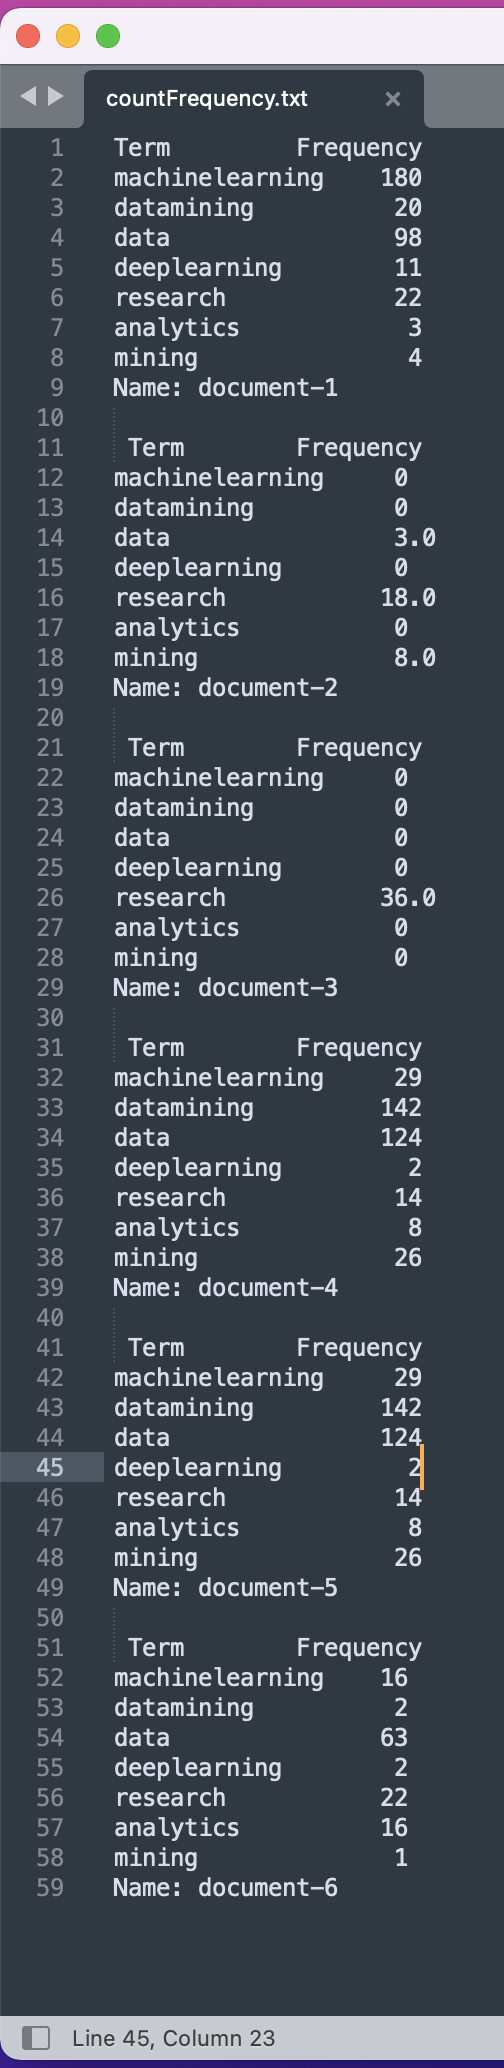

In [4]:
# Displaying the results -->Count Frequency of each 7 given topic word 

print("Displaying the results -->Count Frequency of each 7 given topic word ")


display.Image(sab_absolute_path+'/Results_img/frequency_counts.png', width=300, height=1000)

Displaying the results -->Inverted Index (Term Dictionary) Construction with TF-IDF with Posting files of each 7given topic word


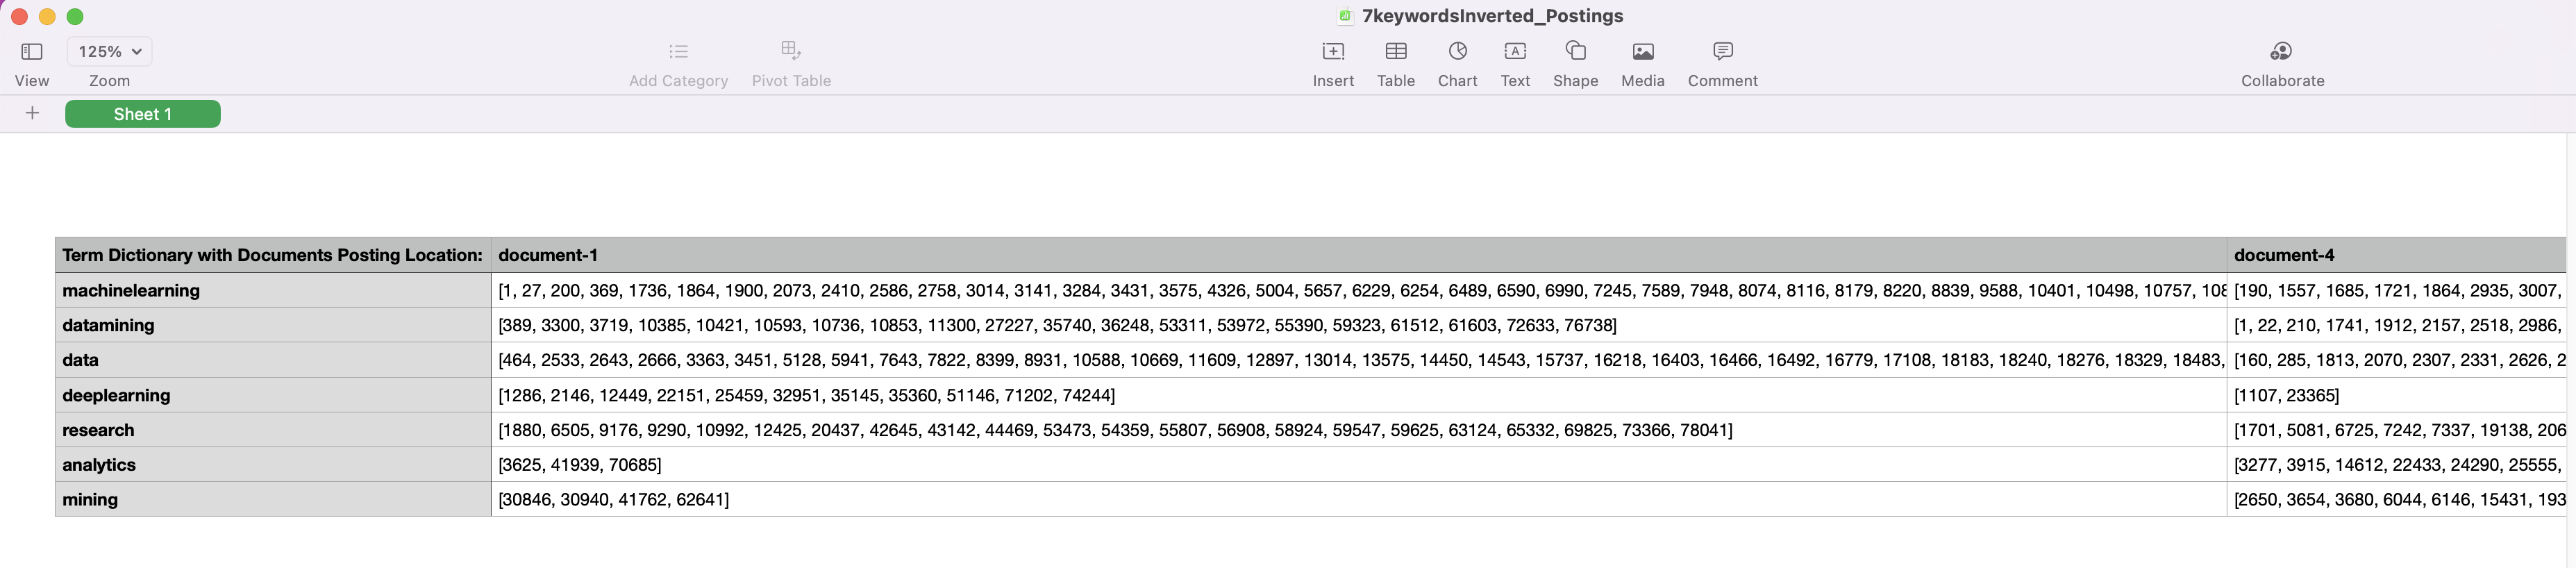

In [5]:
# Displaying the results -->Inverted Index with Posting files of each 7 given topic word 

print("Displaying the results -->Inverted Index (Term Dictionary) Construction with TF-IDF with Posting files of each 7given topic word")


display.Image(sab_absolute_path+'/Results_img/7keywordsInvertedIndexwithPosting.png', width=1000, height=700)

Displaying the results -->Inverted Index (Term Dictionary) Construction with TF-IDF with Posting files of all terms in 6given Documents


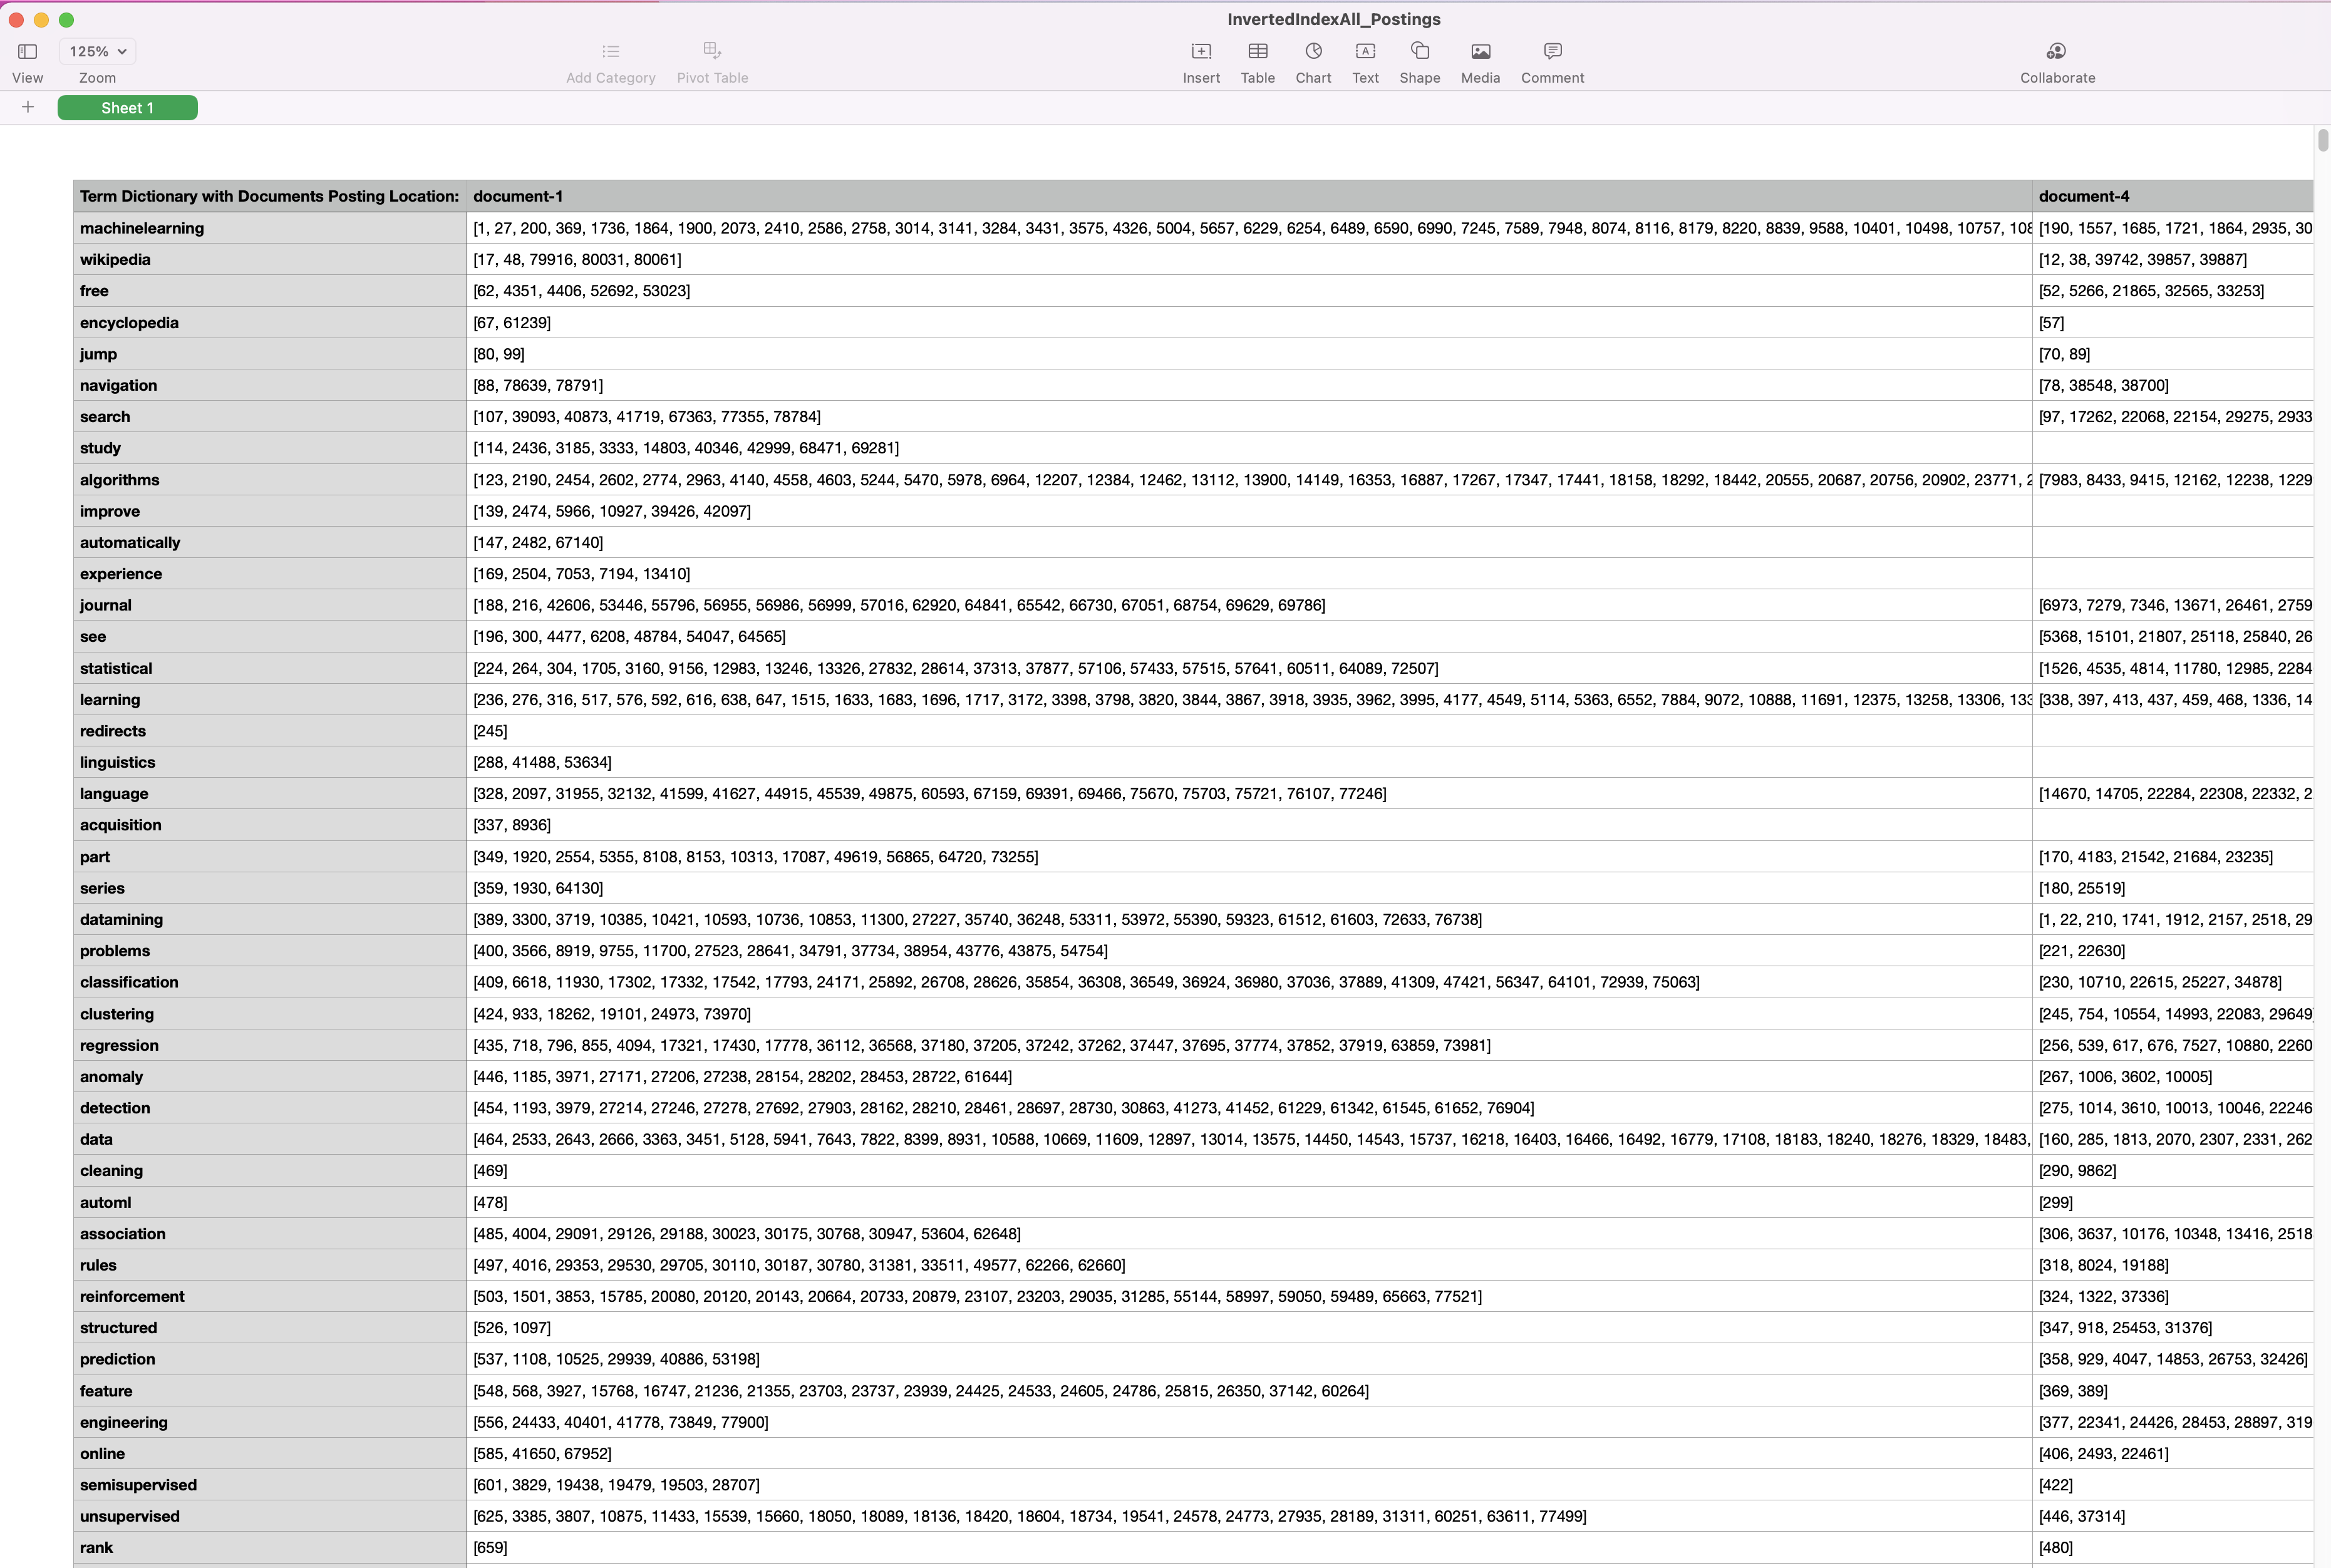

In [6]:
# Displaying the results -->Inverted Index with Posting files of all terms in 6 given Documents 

print("Displaying the results -->Inverted Index (Term Dictionary) Construction with TF-IDF with Posting files of all terms in 6given Documents")


display.Image(sab_absolute_path+'/Results_img/invertedIndex_Postings_all.png', width=1000, height=700)

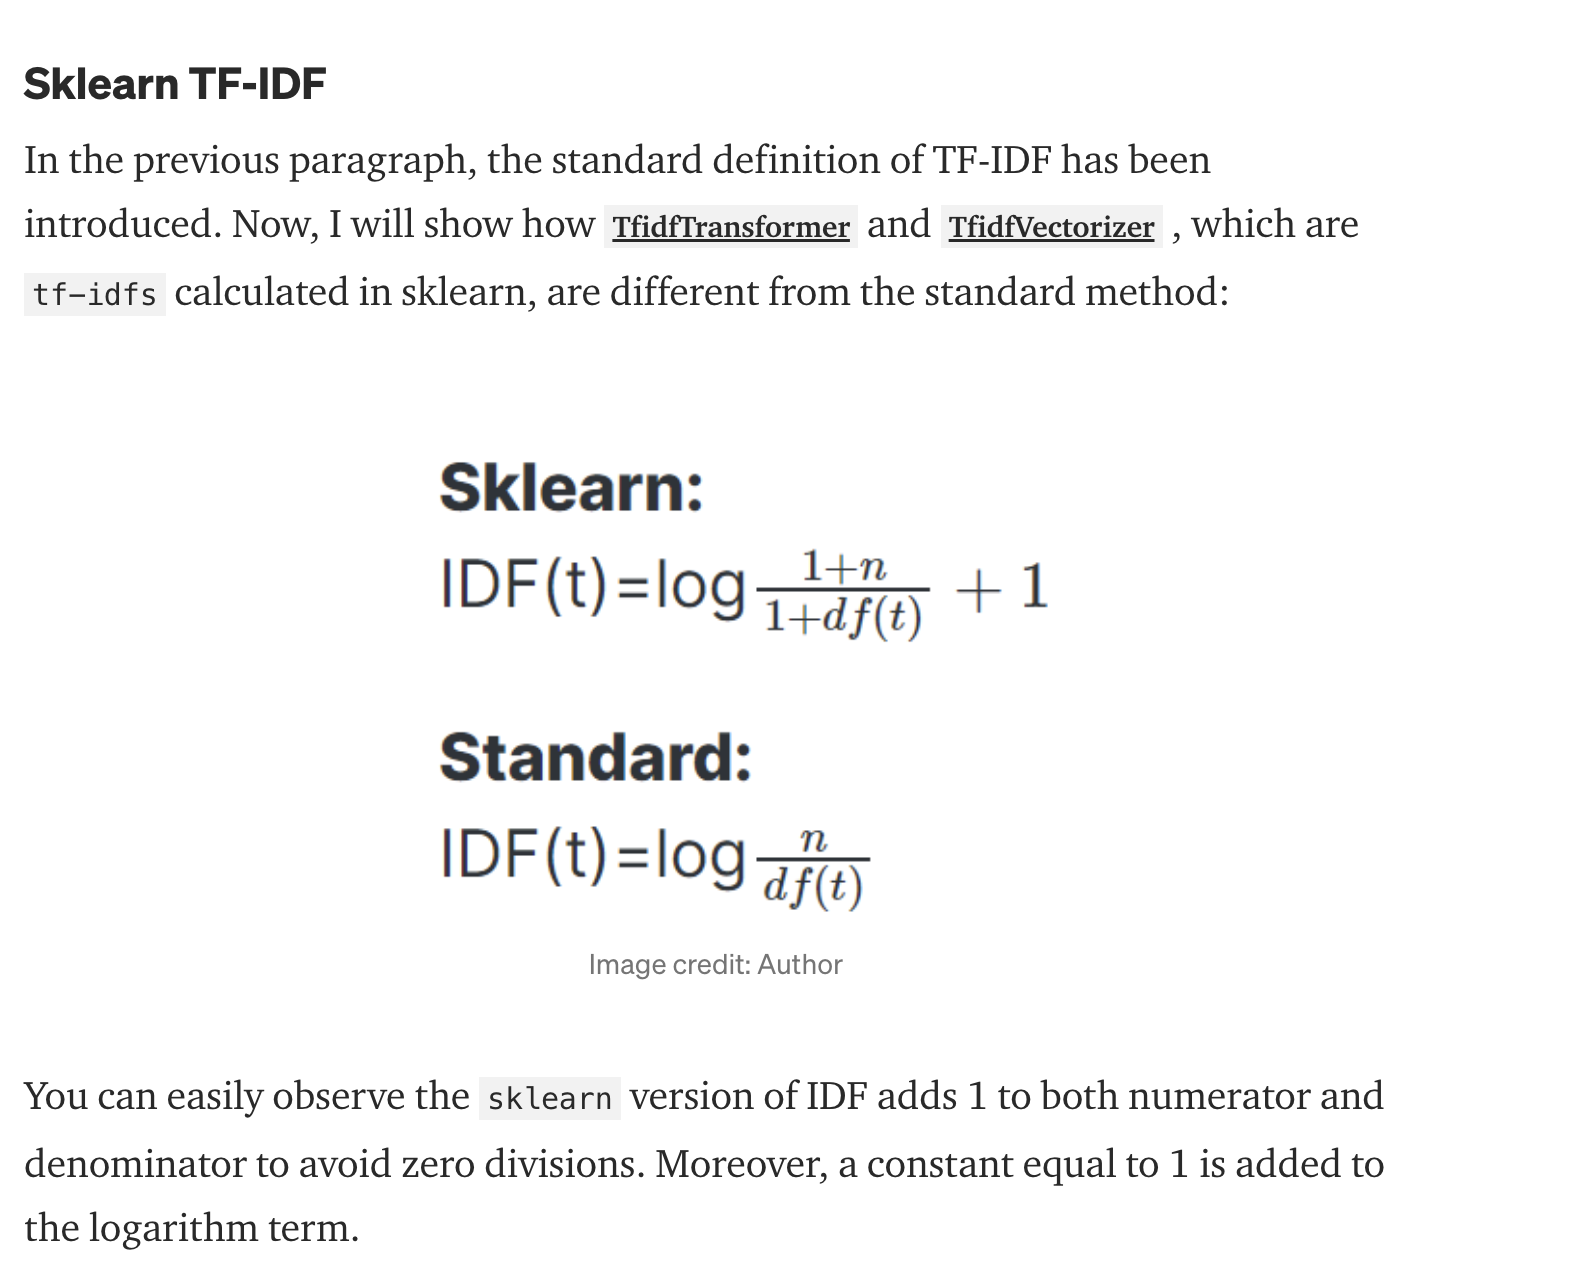

In [7]:
# Sklearn TFIDF formula
# get the image
display.Image(sab_absolute_path+'/Results_img/sklearn_TFIDF_formula.png', width=700, height=400)

In [8]:
# Term Frequency Inverse Document Frequency using Sklearn.
from sklearn.feature_extraction.text import TfidfVectorizer
docA = doc1
docB =doc2
docC = doc3
docD =doc4
docE =doc5
docF= doc6

In [9]:
import pandas as pd
mylist =['deeplearning','machinelearning','data','research','datamining','mining','analytics']
tfidf = TfidfVectorizer(vocabulary=mylist,stop_words = 'english', ngram_range=(1,2))
response = tfidf.fit_transform([docA, docB,docC,docD,docE,docF])
df_tfidf_sklearn = pd.DataFrame(response.toarray(),columns=tfidf.get_feature_names_out())
df_tfidf_sklearn=df_tfidf_sklearn.rename(columns={'machinelearning':'machine learning','datamining':'data mining', 'deeplearning':'deep learning'})
df_tfidf_sklearn.index.name='Documents Numbers:'
df_tfidf_sklearn.index = df_tfidf_sklearn.index + 1
df_tfidf_sklearn.to_csv(sab_absolute_path+'/Results/TFIDF_Vectors.csv', sep='\t', encoding='utf-8')
print(df_tfidf_sklearn)
print('TFIDF Vectors for 7 Terms are Created and save as TFIDF_Vectors.csv!')

                    deep learning  machine learning      data  research  \
Documents Numbers:                                                        
1                        0.054744          0.895808  0.421183  0.081923   
2                        0.000000          0.000000  0.168701  0.877016   
3                        0.000000          0.000000  0.000000  1.000000   
4                        0.010984          0.159269  0.588108  0.057531   
5                        0.010984          0.159269  0.588108  0.057531   
6                        0.032653          0.261220  0.888240  0.268751   

                    data mining    mining  analytics  
Documents Numbers:                                    
1                      0.099534  0.017191   0.014930  
2                      0.000000  0.449870   0.000000  
3                      0.000000  0.000000   0.000000  
4                      0.779869  0.123313   0.043936  
5                      0.779869  0.123313   0.043936  
6             

Displaying Results--> TFIDF vectors using sklearn


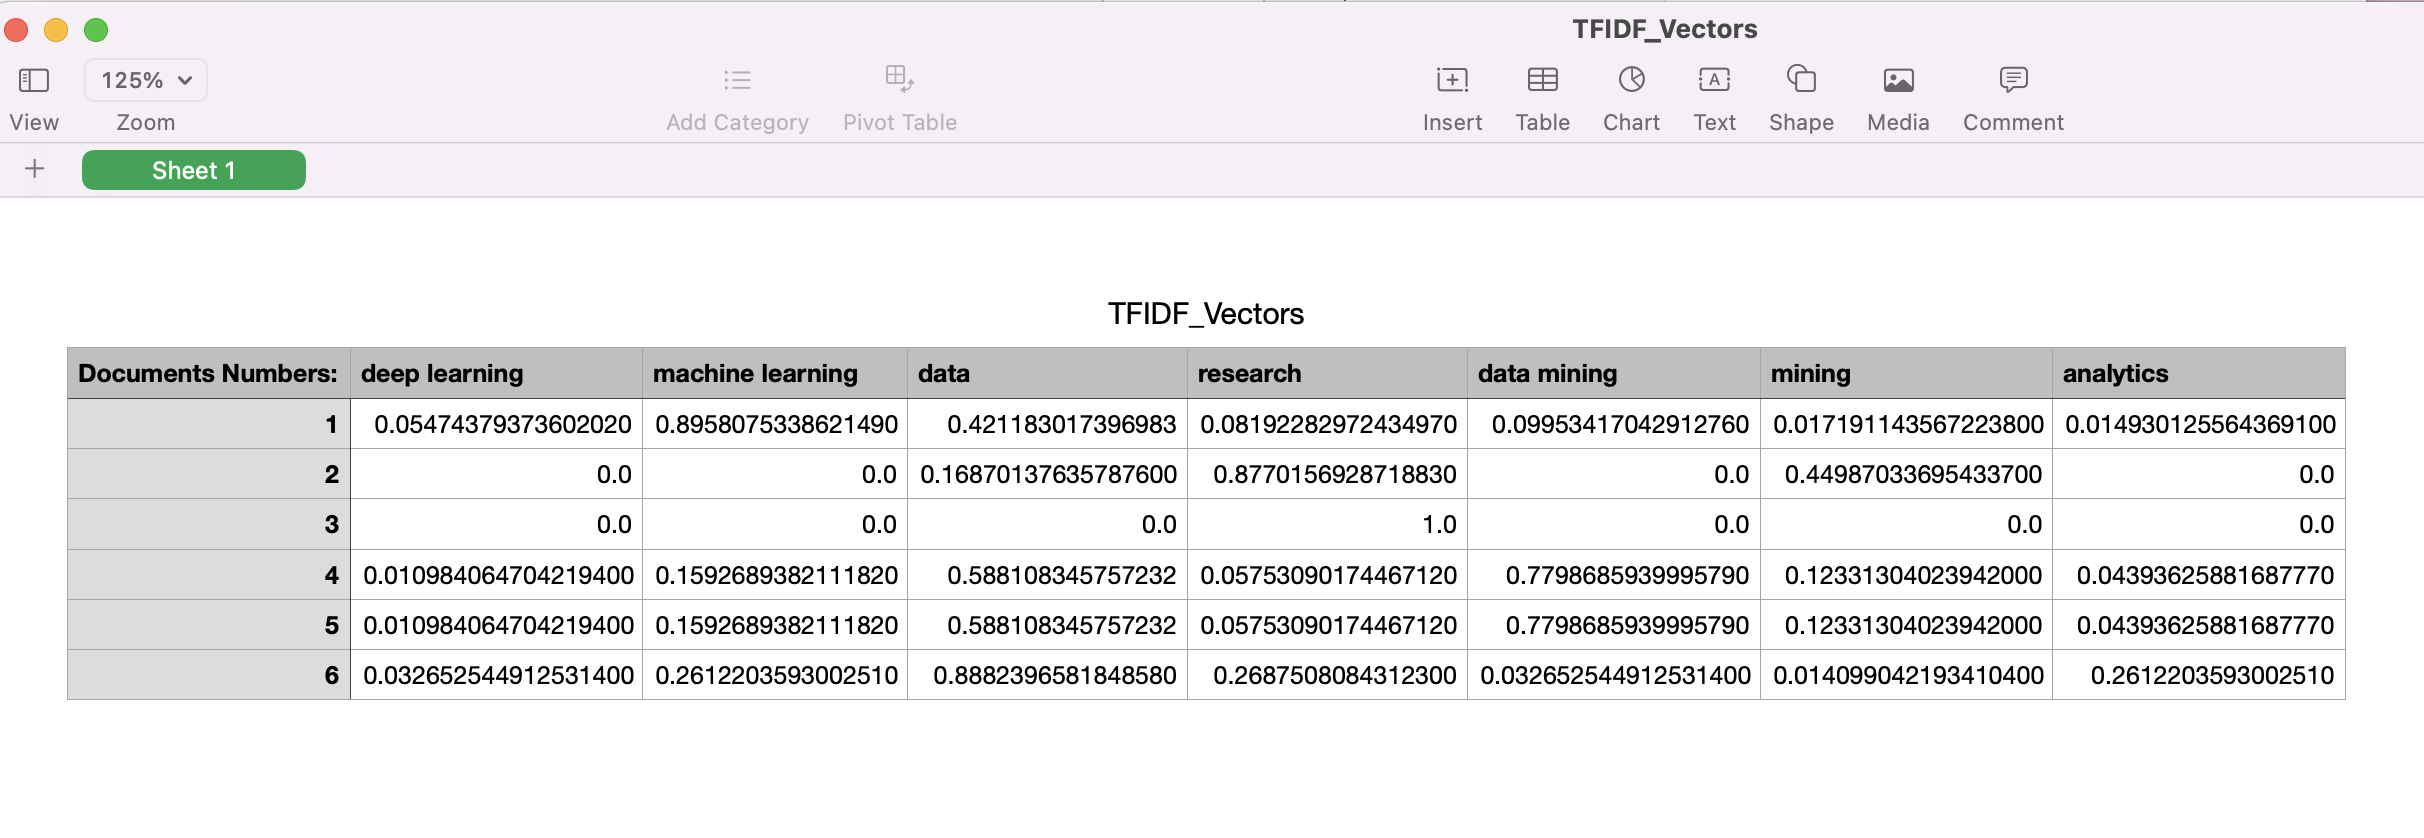

In [10]:
# get the image
print("Displaying Results--> TFIDF vectors using sklearn")
display.Image(sab_absolute_path+'/Results_img/TFIDF_vectors.png', width=700, height=400)


In [11]:
# Cosine similarity is a metric used to determine how similar the documents are irrespective of their size.
# similarity between the documents
all_documents =[doc1,doc2,doc3,doc4,doc5,doc6]

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(all_documents)

doc_term_matrix = sparse_matrix.todense()
tf_df = pd.DataFrame(doc_term_matrix,
                  columns=count_vectorizer.get_feature_names_out(),
                  index=['document1', 'document2', 'document3','document4','document5','document6'])
print(tf_df)
# saving Term frequency count for all the tokens
tf_df.to_csv(sab_absolute_path+'/Similarity_Results/TF_all.csv', sep='\t', encoding='utf-8')

           aaai  aaaimit  aahc  abalone  abandoned  abet  abid  abilities  \
document1     1        1     0        0          1     0     1          0   
document2     0        0     0        1          0     1     0          1   
document3     0        0     0        0          0     0     0          0   
document4     1        0     1        0          0     0     0          0   
document5     1        0     1        0          0     0     0          0   
document6     0        0     0        0          0     0     0          0   

           ability  able  ...  zdnet  zeros  zhan  zhang  zhao  zhihui  zhong  \
document1        4     3  ...      1      1     1      1     0       1      1   
document2        0     0  ...      0      0     0      0     0       0      0   
document3        0     0  ...      0      0     0      0     0       0      0   
document4        1     3  ...      0      0     0      0     0       0      0   
document5        1     3  ...      0      0     0      

In [12]:
from scipy import sparse
import numpy as np
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
Cosine_vector=cosine_similarity(tf_df,tf_df)
Cosine_vector=np.round(Cosine_vector,2)
Cosine_vector_df = pd.DataFrame(Cosine_vector,columns=['document-1', 'document-2', 'document-3','document-4','document-5','document-6'],
                                 index=['document-1', 'document-2', 'document-3','document-4','document-5','document-6'])

sparse_matrix = sparse.csr_matrix(Cosine_vector)

#print(Cosine_vector_df)
Cosine_vector_df.to_csv(sab_absolute_path+'/Similarity_Results/CosineSimilarityVectors.csv', sep='\t', encoding='utf-8')

#print(sparse_matrix)
text_file_2 = open(sab_absolute_path+'/Similarity_Results/DocumentsSimilarity.txt', "w")
text_file_2.write('Documents(i,j) with Similarity Score\n'+str(sparse_matrix))
text_file_2.close()

In [13]:
# GUI Implementation of Inverted Index as search Engine.
# GUI using python Tkinter

from tkinter import *
import webbrowser
ws = Tk()
ws.title("Search Engine Using Inverted Index -TFIDF")
ws.geometry('1000x900')

frame1 = Frame(master=ws, width=1000, height=100, bg="yellow")
frame1.pack(fill=Y, side=TOP)
frame2 = Frame(master=ws, width=1000, height=50, bg="white")
frame2.pack(fill=Y, side=TOP)
frame3 = Frame(master=ws, width=1000, height=750, bg="white")#scrollcommand=scrollbar.set)
frame3.pack(fill=Y, side=TOP)

def callback(url):
   webbrowser.open_new_tab(url)


def retrivalResults():
    q = userInput.get()
    if len(q)!= 0:
        l2=Label(master=frame2, text=f' Search for the Query :{q} found in ', bg='#ffbf00')
        l2.place(x=0,y=0)
        query_user = userInput.get()
        result_docs = search(inverted, str(query_user))
        matches_in=str(result_docs)
        l3=Label(master=frame2,text=f'{matches_in}',bg='lightgreen')
        l3.place(x=350,y=0)
        result_list=[]
        for _, word in word_index(str(query_user)):
            def extract_text(doc, index):
                return documents[doc][index:index+150].replace('\n', ' ')
            for doc in result_docs:
                for index in inverted[word][doc]:
                    result_list.append(extract_text(doc, index))
        h = Scrollbar(ws, orient = 'vertical')
        h.pack(side = RIGHT, fill = Y)
        txt=Text(master=frame3,width=800,yscrollcommand=h.set)
        txt.bind("<Key>", lambda e: "break")
        txt['font'] = ('consolas', '15')
        txt.place(x=10,y=25)
        for x in result_list:
            txt.insert(END,x +'....\n')

l1=Label(master=frame1,text="Enter the query to search:", background="orange")
l1.place(x=0,y=10)
userInput = Entry(ws)
userInput.place(x=235,y=10)

b1=Button(master=frame1,text="Search",command=retrivalResults)
b1.place(x=235,y=50)

l4= Label(master=frame3 ,text='Scraped TextData from the following 6 Live HTML Pages ',bg='orange')
l4.place(x=0,y=500)
# Url of the documents (dataset used in this project)
doc1_link= Label(master=frame3,text='Doc1-MachineLearning',bg='lightgreen')
doc1_link.place(x=0,y=540)
doc1_link.bind("<Button-1>",lambda e:
               callback("https://en.wikipedia.org/wiki/Machine_learning")
               )
doc2_link= Label(master=frame3,text='Doc2-Engineering',bg='lightgreen')
doc2_link.place(x=200,y=540)
doc2_link.bind("<Button-1>",lambda e:
               callback("https://en.wikipedia.org/wiki/Engineering")
               )

doc3_link= Label(master=frame3,text='Doc3-Research',bg='lightgreen')
doc3_link.place(x=400,y=540)
doc3_link.bind("<Button-1>",lambda e:
               callback("https://my.clevelandclinic.org/research")
               )

doc4_link= Label(master=frame3,text='Doc4-DataMining',bg='lightgreen')
doc4_link.place(x=550,y=540)
doc4_link.bind("<Button-1>",lambda e:
               callback("https://en.wikipedia.org/wiki/Data_mining")
               )
doc5_link= Label(master=frame3,text='Doc5-DataMining#',bg='lightgreen')
doc5_link.place(x=700,y=540)
doc5_link.bind("<Button-1>",lambda e:
               callback("https://en.wikipedia.org/wiki/Data_mining#Data_mining")
               )

doc6_link= Label(master=frame3,text='Doc6-sschung',bg='lightgreen')
doc6_link.place(x=850,y=540)
doc6_link.bind("<Button-1>",lambda e:
               callback("http://cis.csuohio.edu/~sschung/")
               )


ws.mainloop()